In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
file_path = 'Machine_Learning_Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Print data information and first few rows
print("Data Information:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Landmark_0_X  2331 non-null   float64
 1   Landmark_1_X  2331 non-null   float64
 2   Landmark_2_X  2331 non-null   float64
 3   Landmark_3_X  2331 non-null   float64
 4   Landmark_4_X  2331 non-null   float64
 5   Landmark_5_X  2331 non-null   float64
 6   Landmark_0_Y  2331 non-null   float64
 7   Landmark_1_Y  2331 non-null   float64
 8   Landmark_2_Y  2331 non-null   float64
 9   Landmark_3_Y  2331 non-null   float64
 10  Landmark_4_Y  2331 non-null   float64
 11  Landmark_5_Y  2331 non-null   float64
 12  Label         2331 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 236.9 KB
None

First few rows of the dataset:
   Landmark_0_X  Landmark_1_X  Landmark_2_X  Landmark_3_X  Landmark_4_X  \
0      0.243746      0.483538      0.402461      0.533551      0.

In [4]:
# Define the class label column
class_column = 'Label'

In [5]:
# Extract features and group by class label
feature_columns = data.columns.drop(class_column)
class_groups = data.groupby(class_column)
class_data = {class_name: class_groups.get_group(class_name)[feature_columns].values for class_name in class_groups.groups}

In [6]:
# Compute class means (centroids)
class_means = {class_name: np.mean(features, axis=0) for class_name, features in class_data.items()}
print("\nClass Means (Centroids):")
for class_name, mean in class_means.items():
    print(f"Class {class_name}: {mean}")


Class Means (Centroids):
Class 0: [0.37048802 0.56884936 0.4703373  0.48842291 0.25429843 0.68983168
 0.41961594 0.40614513 0.47736644 0.53700366 0.45613177 0.43414791]
Class 1: [0.32264018 0.6341877  0.48134506 0.49392721 0.16880581 0.82297156
 0.42994599 0.42539808 0.55692271 0.63378018 0.45514324 0.44372585]


In [7]:
# Compute class standard deviations (spread)
class_std_devs = {class_name: np.std(features, axis=0) for class_name, features in class_data.items()}
print("\nClass Standard Deviations (Spread):")
for class_name, std_dev in class_std_devs.items():
    print(f"Class {class_name}: {std_dev}")


Class Standard Deviations (Spread):
Class 0: [0.10312635 0.10456733 0.10466362 0.10425224 0.09968967 0.09737984
 0.10330971 0.10004079 0.09962709 0.10067875 0.10277192 0.09861689]
Class 1: [0.09334136 0.09116434 0.09190094 0.09343957 0.09331579 0.09028638
 0.09155664 0.09038655 0.08808851 0.08673252 0.09508451 0.08580931]


In [8]:
# Calculate interclass distance between two centroids
class_names = list(class_data.keys())
centroid1 = class_means[class_names[0]]
centroid2 = class_means[class_names[1]]
interclass_distance = np.linalg.norm(centroid1 - centroid2)
print("\nInterclass Distance between Class 0 and Class 1 Centroids:")
print(interclass_distance)


Interclass Distance between Class 0 and Class 1 Centroids:
0.21911228528695767


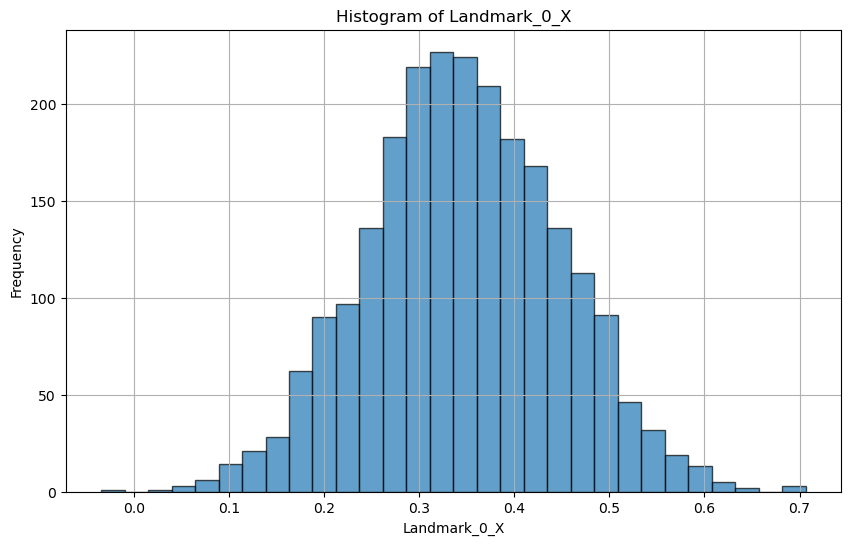

In [9]:
# Plot histogram of a specific feature
feature_name = 'Landmark_0_X'
feature_data = data[feature_name].values
plt.figure(figsize=(10, 6))
plt.hist(feature_data, bins=30, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [10]:
# Compute mean and variance of the feature
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)
print(f"Mean of {feature_name}: {mean_value}")
print(f"Variance of {feature_name}: {variance_value}")


Mean of Landmark_0_X: 0.34673858092458687
Variance of Landmark_0_X: 0.010253160858422917


In [11]:
# Compute Minkowski distances between two feature vectors
feature_vector1 = data['Landmark_0_X'].values
feature_vector2 = data['Landmark_1_X'].values

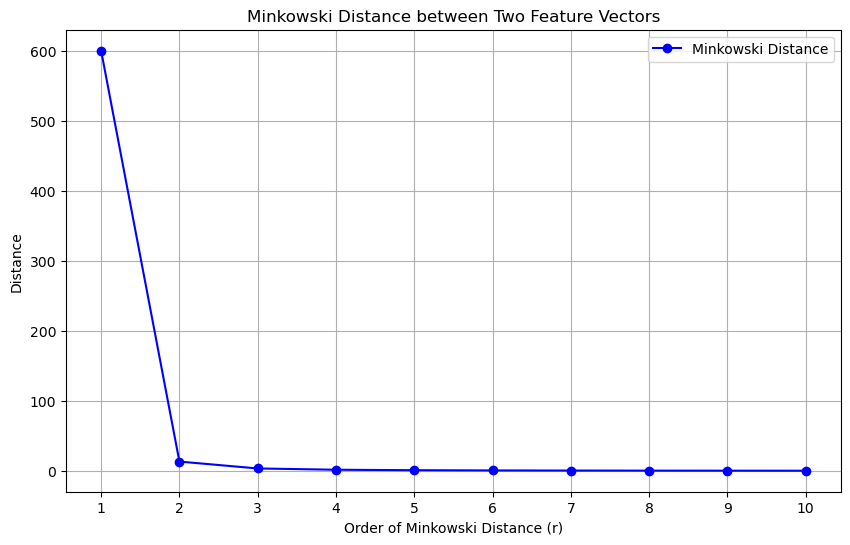

Minkowski Distances:
r = 1: Distance = 599.8727
r = 2: Distance = 13.9721
r = 3: Distance = 4.1736
r = 4: Distance = 2.3379
r = 5: Distance = 1.6771
r = 6: Distance = 1.3582
r = 7: Distance = 1.1772
r = 8: Distance = 1.0634
r = 9: Distance = 0.9867
r = 10: Distance = 0.9323


In [12]:
def minkowski_distance(vector1, vector2, r):
    return np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)

r_values = range(1, 11)
distances = [minkowski_distance(feature_vector1, feature_vector2, r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b', label='Minkowski Distance')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('Order of Minkowski Distance (r)')
plt.ylabel('Distance')
plt.xticks(r_values)
plt.grid(True)
plt.legend()
plt.show()

print("Minkowski Distances:")
for r, distance in zip(r_values, distances):
    print(f"r = {r}: Distance = {distance:.4f}")

In [13]:
# Prepare data for kNN classifier
unique_classes = data['Label'].unique()
print(f"Unique classes in the dataset: {unique_classes}")
class1, class2 = unique_classes[:2]
filtered_data = data[(data['Label'] == class1) | (data['Label'] == class2)]
X = filtered_data.drop('Label', axis=1).values
y = filtered_data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Unique classes in the dataset: [0 1]
Shape of X_train: (1631, 12)
Shape of X_test: (700, 12)
Shape of y_train: (1631,)
Shape of y_test: (700,)


In [14]:
# Train and evaluate kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy of the kNN classifier: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy of the kNN classifier: 0.8671

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       353
           1       0.87      0.86      0.87       347

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700


Confusion Matrix:
[[308  45]
 [ 48 299]]


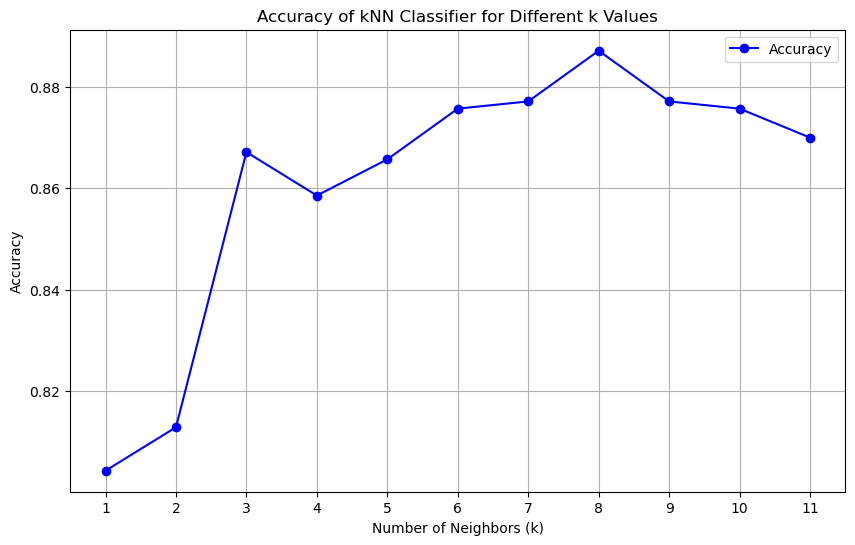

k-values and their corresponding accuracies:
k = 1: Accuracy = 0.8043
k = 2: Accuracy = 0.8129
k = 3: Accuracy = 0.8671
k = 4: Accuracy = 0.8586
k = 5: Accuracy = 0.8657
k = 6: Accuracy = 0.8757
k = 7: Accuracy = 0.8771
k = 8: Accuracy = 0.8871
k = 9: Accuracy = 0.8771
k = 10: Accuracy = 0.8757
k = 11: Accuracy = 0.8700

Accuracy of kNN classifier (k=1): 0.8043
Accuracy of kNN classifier (k=3): 0.8671


In [15]:
# Evaluate kNN classifier with different k values
k_values = range(1, 12)
accuracies = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy of kNN Classifier for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

print("k-values and their corresponding accuracies:")
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k}: Accuracy = {accuracy:.4f}")

accuracy_k1 = accuracies[0]
accuracy_k3 = accuracies[2]
print(f"\nAccuracy of kNN classifier (k=1): {accuracy_k1:.4f}")
print(f"Accuracy of kNN classifier (k=3): {accuracy_k3:.4f}")


In [16]:
# Make predictions for the test set
predictions = knn_classifier.predict(X_test)
print("\nPredictions for the entire test set:")
print(predictions)



Predictions for the entire test set:
[1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1
 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1

In [17]:
# Predict class for a specific test vector
test_vector = X_test[0]
predicted_class = knn_classifier.predict([test_vector])
print(f"\nPredicted class for the specific test vector {test_vector}: {predicted_class[0]}")
actual_class = y_test[0]
print(f"Actual class for the specific test vector: {actual_class}")



Predicted class for the specific test vector [0.31980887 0.63329153 0.38191731 0.63402689 0.10824552 1.01241193
 0.46639128 0.44070711 0.42274924 0.47717782 0.51940843 0.43819478]: 1
Actual class for the specific test vector: 1
